In [1]:
import pandas as pd

from settings import key
from datetime import datetime


In [2]:
coords = []

with open("server.log", "r") as f:
    while line := f.readline():
        if '/api/v1/forecast/cities?lat=' in line:
            coords.append([
                str(float(line.split("=")[1].split("&")[0])), # lat
                str(float(line.split("=")[2].split("&")[0].split(" ")[0])), # lon
                datetime.strptime(line.split(",")[0][1:], '%Y-%m-%d %H:%M:%S'), # time
            ])


In [3]:
df = pd.DataFrame(coords)


In [4]:
df.columns

RangeIndex(start=0, stop=3, step=1)

In [5]:
df["date_h"] = df[2].apply(lambda r: r.strftime("%Y-%m-%d %H"))

In [6]:
df_h = pd.DataFrame(df.groupby("date_h").count()[1]/3)

<Axes: xlabel='date_h'>

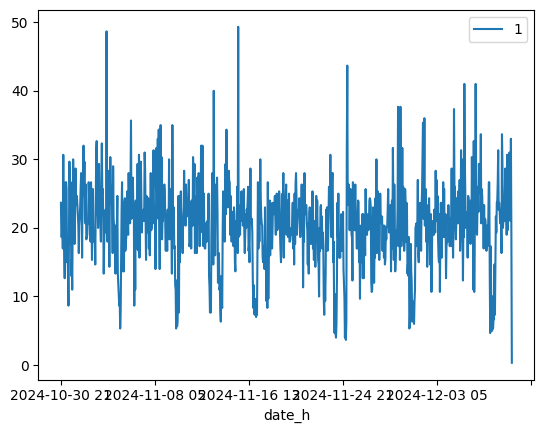

In [7]:
df_h.plot()

In [8]:
from sklearn import linear_model


In [9]:
reg = linear_model.LinearRegression()


In [10]:
import numpy as np


In [11]:
df_h_vals = df_h[1].values.reshape(-1, 1)
df_h_ct = np.array(range(len(df_h_vals))).reshape(-1, 1)


In [12]:
reg.fit(df_h_ct, df_h_vals)


LinearRegression()

In [13]:
import matplotlib.pyplot as plt


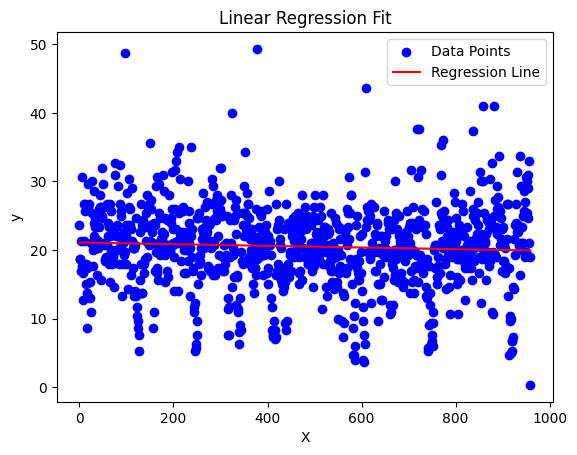

In [14]:
y_pred = reg.predict(df_h_ct)
plt.scatter(df_h_ct, df_h_vals, color='blue', label='Data Points')
plt.plot(df_h_ct, y_pred, color='red', label='Regression Line')

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Fit")

plt.show()

In [15]:
y_pred

array([[21.10251257],
       [21.10130165],
       [21.10009073],
       [21.0988798 ],
       [21.09766888],
       [21.09645796],
       [21.09524704],
       [21.09403611],
       [21.09282519],
       [21.09161427],
       [21.09040334],
       [21.08919242],
       [21.0879815 ],
       [21.08677057],
       [21.08555965],
       [21.08434873],
       [21.08313781],
       [21.08192688],
       [21.08071596],
       [21.07950504],
       [21.07829411],
       [21.07708319],
       [21.07587227],
       [21.07466134],
       [21.07345042],
       [21.0722395 ],
       [21.07102858],
       [21.06981765],
       [21.06860673],
       [21.06739581],
       [21.06618488],
       [21.06497396],
       [21.06376304],
       [21.06255212],
       [21.06134119],
       [21.06013027],
       [21.05891935],
       [21.05770842],
       [21.0564975 ],
       [21.05528658],
       [21.05407565],
       [21.05286473],
       [21.05165381],
       [21.05044289],
       [21.04923196],
       [21